In [55]:
shapefile_path = "jan12023/sigmets_202301010000_202302010000.shp"
csv_path = "sigmets_202404180000_202404200000.csv"

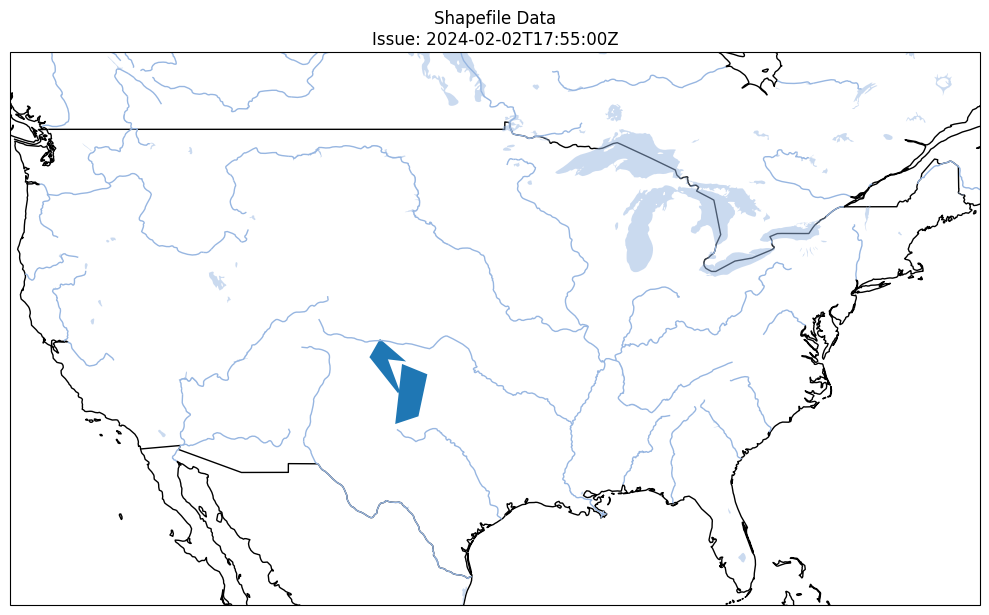

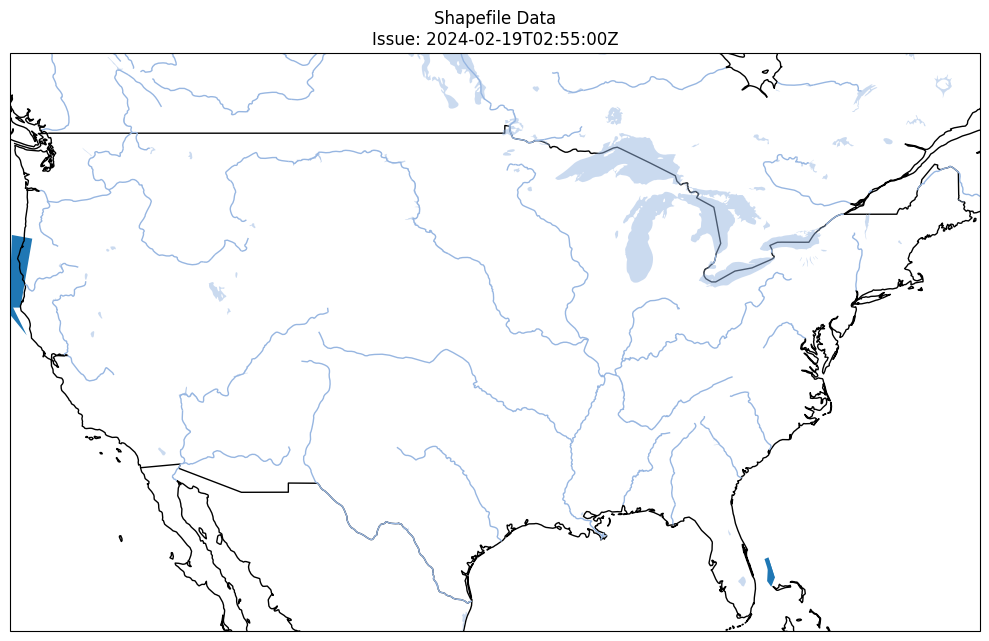

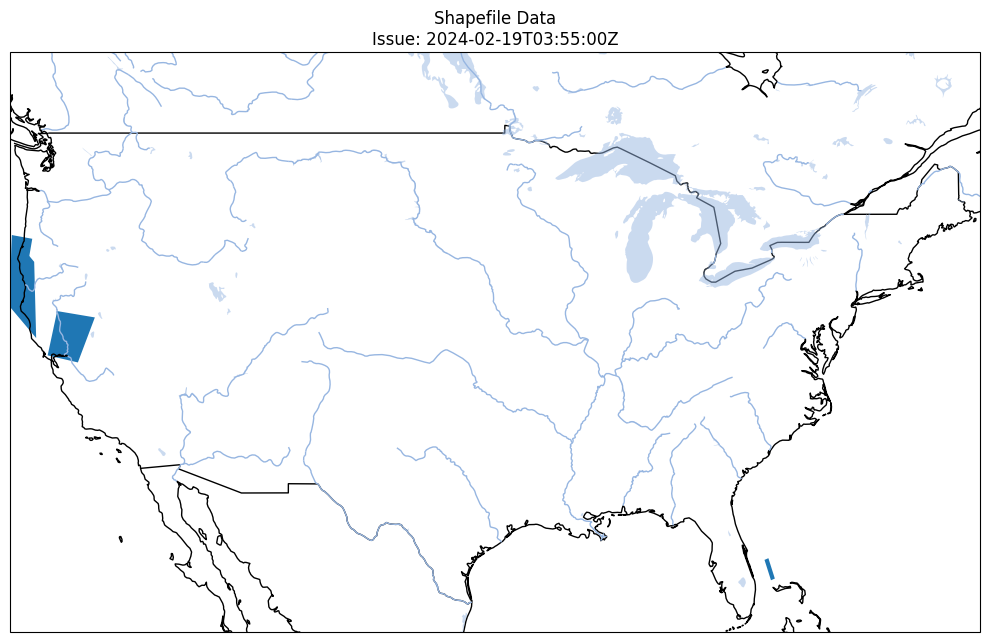

In [56]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Read the shapefile
gdf = gpd.read_file(shapefile_path)

# Sort the data by the "ISSUE" field
gdf = gdf.sort_values(by="ISSUE")

def update(frame):
    # Create a new figure and axis with Cartopy projection
    fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={"projection": ccrs.PlateCarree()})

    # Add Cartopy borders and features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)

    # Set the extent of the map to focus on the United States
    ax.set_extent([-125, -66.5, 24.5, 49.5])

    # Get the current issue time
    current_issue = gdf.iloc[frame]["ISSUE"]

    # Filter the GeoDataFrame to include only the shapes active at the current issue time
    current_shapes = gdf[(gdf["ISSUE"] <= current_issue) & (gdf["EXPIRE"] > current_issue)]

    # Customize the plot (optional)
    ax.set_title(f"Shapefile Data\nIssue: {current_issue}")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

    # Plot the current shapes
    current_shapes.plot(ax=ax, markersize=5)

    # Display the plot
    plt.tight_layout()
    plt.show()

while True:
    # Prompt the user to enter the index
    index = input("Enter the index of the shape to display (or 'q' to quit): ")
    if index.lower() == 'q':
        break
    try:
        index = int(index)
        if 0 <= index < len(gdf):
            update(index)
        else:
            print("Invalid index. Please enter a valid index.")
    except ValueError:
        print("Invalid input. Please enter a valid integer index.")